This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [9]:
## import needed libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [12]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
print(user_data.info())
print(user_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     127 non-null    int64  
 1   game                   127 non-null    object 
 2   season                 127 non-null    int64  
 3   play_length            123 non-null    float64
 4   box_length             127 non-null    int64  
 5   time_delta             124 non-null    float64
 6   complexity             125 non-null    float64
 7   rating                 124 non-null    float64
 8   rank                   124 non-null    float64
 9   live                   127 non-null    object 
 10  start_player           85 non-null     object 
 11  winner                 109 non-null    object 
 12  bp_score               88 non-null     float64
 13  bp_score_normal        89 non-null     float64
 14  bp_score_adjusted      89 non-null     float64
 15  bp_pic

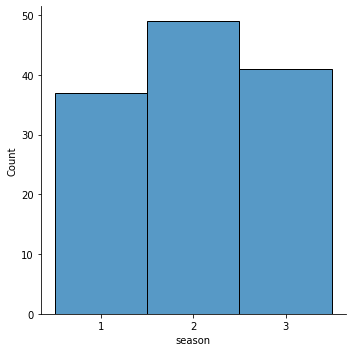

In [18]:
user_data["season"] = user_data["season"].astype(str)
seasons = user_data["season"]
sns.displot(seasons)
plt.show()

In [16]:
season_mean_delta = user_data.groupby("season").time_delta.mean()
print(season_mean_delta)

season
1    15.810811
2    19.612245
3    18.526316
Name: time_delta, dtype: float64


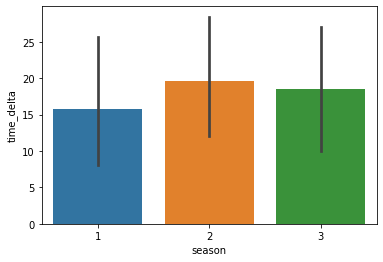

In [17]:
plt.close()
sns.barplot(
  data=user_data,
  x="season", 
  y="time_delta"
)
plt.show()